In [139]:
import os
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPool2D,Flatten
from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [39]:
(x_train_all,y_train_all),(x_test,y_test) = cifar10.load_data()

In [40]:
x_train_all,x_test = x_train_all/255.0,x_test/255.0

In [81]:
def rgb_to_grayscale(images):
    return 0.2989 * images[..., 0] + 0.5870 * images[..., 1] + 0.1140 * images[..., 2]

In [82]:
x_train_all = rgb_to_grayscale(x_train_all)
x_test = rgb_to_grayscale(x_test)

In [67]:
y_train_all = tf.keras.utils.to_categorical(y_train_all.reshape((50000,)))

In [93]:
x_train_all = np.expand_dims(x_train_all, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [94]:
x_test.shape

(10000, 32, 32, 1)

In [95]:
y_test = tf.keras.utils.to_categorical(y_test.reshape((10000,)))

ValueError: cannot reshape array of size 100000 into shape (10000,)

In [96]:
x_val = x_train_all[:10000]
y_val = y_train_all[:10000]

In [97]:
x_train = x_train_all[10000:]
y_train = y_train_all[10000:]

In [98]:
x_train_xs = x_train[:1000]
y_train_xs = y_train[:1000]

In [108]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,1)),
    MaxPool2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Dropout(0.3),
    Flatten(),
    Dense(units=64,activation='relu'),
    Dense(units=16,activation='relu'),
    Dense(units=10,activation='softmax'),
])

In [109]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [110]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 2, 2, 128)      

## Tensorboard

mod

In [77]:
samples_per_batch = 1000

In [103]:
y_train.shape

(40000, 10)

In [112]:

nr_epochs = 100
model.fit(x_train,y_train,
            batch_size = samples_per_batch, epochs=10,
            validation_data = (x_val,y_val) )

Epoch 1/10
40/40 [==============================] - 10s 244ms/step - loss: 0.4704 - accuracy: 0.8322 - val_loss: 0.8676 - val_accuracy: 0.7234
Epoch 2/10
40/40 [==============================] - 10s 247ms/step - loss: 0.4716 - accuracy: 0.8327 - val_loss: 0.8963 - val_accuracy: 0.7151
Epoch 3/10
40/40 [==============================] - 11s 265ms/step - loss: 0.4775 - accuracy: 0.8304 - val_loss: 0.8643 - val_accuracy: 0.7194
Epoch 4/10
40/40 [==============================] - 11s 279ms/step - loss: 0.4614 - accuracy: 0.8349 - val_loss: 0.8975 - val_accuracy: 0.7144
Epoch 5/10
40/40 [==============================] - 10s 248ms/step - loss: 0.4613 - accuracy: 0.8368 - val_loss: 0.8726 - val_accuracy: 0.7217
Epoch 6/10
40/40 [==============================] - 11s 265ms/step - loss: 0.4511 - accuracy: 0.8384 - val_loss: 0.8711 - val_accuracy: 0.7227
Epoch 7/10
40/40 [==============================] - 13s 331ms/step - loss: 0.4570 - accuracy: 0.8356 - val_loss: 0.8736 - val_accuracy: 0.7217

In [113]:
model.save('cifar10.h5')

In [121]:
cifar10_classes = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck"
]

1/1 [==============================] - 0s 20ms/step


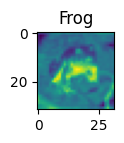

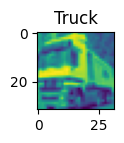

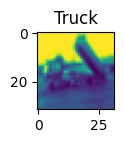

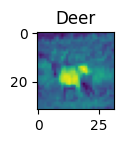

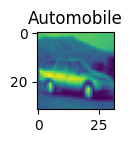

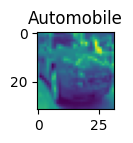

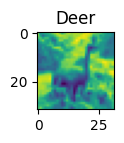

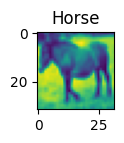

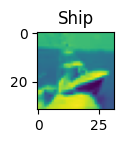

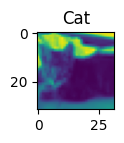

In [143]:
for i in range(10):
    test = np.expand_dims(x_val[i],axis=0)
    plt.figure(figsize=(1,1))
    plt.title(cifar10_classes[np.argmax(model.predict(test),axis=1)[0]])
    plt.imshow(x_val[i])
plt.show()

In [125]:

test = np.expand_dims(x_val[4],axis=0)
cifar10_classes[np.argmax(model.predict(test),axis=1)[0]]

1/1 [==============================] - 0s 18ms/step


'Automobile'

In [127]:
model.predict(x_val)

313/313 [==============================] - 1s 3ms/step


array([[4.177e-03, 2.816e-05, 9.770e-02, ..., 4.074e-03, 1.548e-03,
        1.546e-04],
       [5.990e-04, 1.447e-03, 3.235e-06, ..., 8.895e-04, 2.225e-05,
        9.970e-01],
       [4.286e-01, 2.384e-02, 2.658e-02, ..., 5.419e-02, 5.709e-04,
        4.523e-01],
       ...,
       [6.042e-06, 5.796e-01, 9.334e-08, ..., 1.788e-06, 6.719e-06,
        4.203e-01],
       [5.642e-03, 8.710e-01, 1.955e-04, ..., 1.228e-04, 2.135e-03,
        1.202e-01],
       [6.667e-04, 1.031e-06, 8.526e-03, ..., 8.200e-01, 6.501e-05,
        7.619e-05]], dtype=float32)

In [129]:
np.argmax(model.predict(test), axis=1)

1/1 [==============================] - 0s 16ms/step


array([1], dtype=int64)

In [130]:
for n,i in enumerate(x_val[:10]):
    j = np.expand_dims(i,axis=0)
    print(f" Predicted: {np.argmax(model.predict(j), axis=1)[0]} vs Actual : {y_val[n][0]}")

1/1 [==============================] - 0s 16ms/step
 Predicted: 6 vs Actual : 0.0
1/1 [==============================] - 0s 20ms/step
 Predicted: 9 vs Actual : 0.0
1/1 [==============================] - 0s 20ms/step
 Predicted: 9 vs Actual : 0.0
1/1 [==============================] - 0s 20ms/step
 Predicted: 4 vs Actual : 0.0
1/1 [==============================] - 0s 22ms/step
 Predicted: 1 vs Actual : 0.0
1/1 [==============================] - 0s 22ms/step
 Predicted: 1 vs Actual : 0.0
1/1 [==============================] - 0s 22ms/step
 Predicted: 4 vs Actual : 0.0
1/1 [==============================] - 0s 28ms/step
 Predicted: 7 vs Actual : 0.0
1/1 [==============================] - 0s 26ms/step
 Predicted: 8 vs Actual : 0.0
1/1 [==============================] - 0s 22ms/step
 Predicted: 3 vs Actual : 0.0


In [131]:
test_loss,test_accuracy  = model.evaluate(x_test,y_test)
print(f"Test loss is {test_loss} test acccuracy is {test_accuracy}")

313/313 [==============================] - 1s 4ms/step - loss: 0.8891 - accuracy: 0.7158
Test loss is 0.8891494870185852 test acccuracy is 0.7157999873161316


In [135]:
conf_matrix = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(model.predict(x_test), axis=1))

313/313 [==============================] - 1s 3ms/step


In [136]:
conf_matrix

array([[740,  20,  79,  16,  17,   4,  12,  15,  63,  34],
       [ 10, 852,   7,   5,   7,  12,  11,   3,  15,  78],
       [ 58,  10, 628,  36,  81,  81,  53,  29,  12,  12],
       [ 30,  11, 121, 462,  54, 173,  60,  41,  24,  24],
       [ 18,   4, 102,  54, 645,  43,  45,  77,   9,   3],
       [  7,   6,  90, 100,  36, 669,  22,  56,   5,   9],
       [ 12,  14,  66,  43,  26,  39, 775,   6,  10,   9],
       [ 15,   6,  36,  29,  45,  84,  11, 754,   3,  17],
       [ 68,  37,  23,  11,   6,   7,   9,   2, 799,  38],
       [ 15,  73,  14,  13,   4,   5,   9,  15,  18, 834]], dtype=int64)

In [137]:
accuarcy = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8891 - accuracy: 0.7158


In [138]:
accuarcy

[0.8891494870185852, 0.7157999873161316]

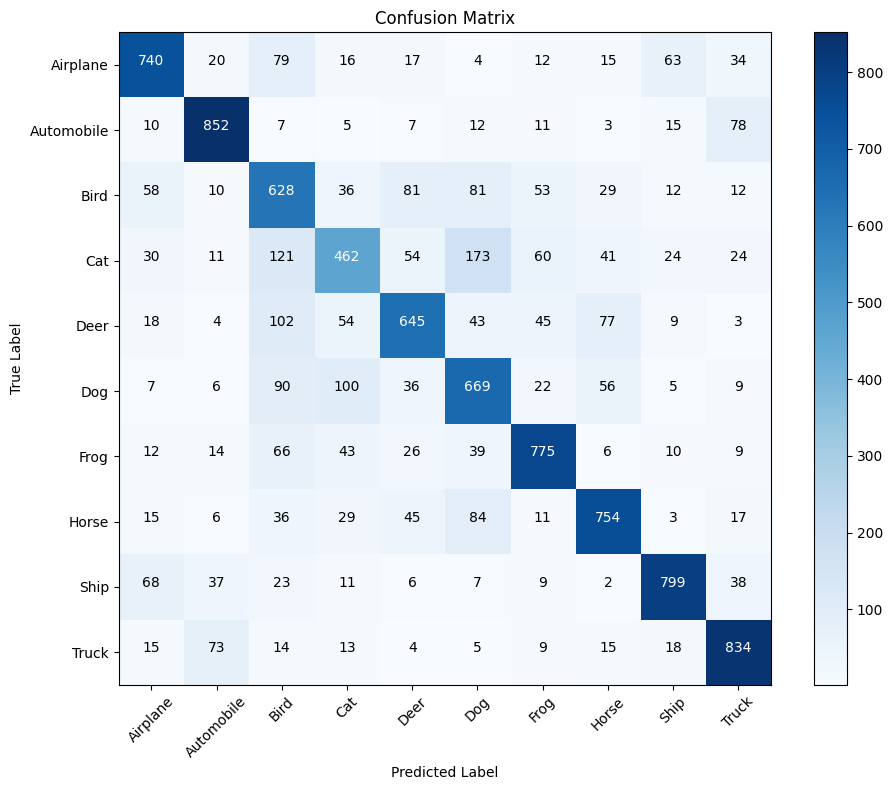

In [140]:
cm = conf_matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(cifar10_classes))
plt.xticks(tick_marks, cifar10_classes, rotation=45)
plt.yticks(tick_marks, cifar10_classes)

thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j], horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()